In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats


In [21]:
dfUS = pd.read_csv('Suicide.csv')
master=pd.read_csv('cleanData.csv')
masterCat=master.copy()

In [25]:
master[master['country']=='United States']

,country,year,sex,age,suicides_no,population,suicides/100kpop,country-year,gdp_for_year,gdp_per_capita,generation,popNorma
26848,United States,1985,1,6,2177,4064000,53.57,United States1985,"4,346,734,000,000",19693,1,0.092769
26849,United States,1985,1,5,5302,17971000,29.50,United States1985,"4,346,734,000,000",19693,1,0.410244
26850,United States,1985,1,3,5134,20986000,24.46,United States1985,"4,346,734,000,000",19693,3,0.479072
26851,United States,1985,1,4,6053,26589000,22.77,United States1985,"4,346,734,000,000",19693,2,0.606980
26852,United States,1985,1,2,4267,19962000,21.38,United States1985,"4,346,734,000,000",19693,4,0.455696
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,2,3,1444,21555712,6.70,United States2015,"18,120,714,000,000",60387,5,0.492078
27216,United States,2015,2,2,1132,21633813,5.23,United States2015,"18,120,714,000,000",60387,5,0.493861
27217,United States,2015,2,6,540,11778666,4.58,United States2015,"18,120,714,000,000",60387,2,0.268883
27218,United States,2015,1,1,255,21273987,1.20,United States2015,"18,120,714,000,000",60387,6,0.485646


In [16]:
master.age.unique()

array([2, 4, 6, 3, 5, 1], dtype=int64)

In [17]:
master.generation.unique()

array([4, 2, 1, 3, 5, 6], dtype=int64)

<AxesSubplot: xlabel='suicides/100kpop', ylabel='Count'>

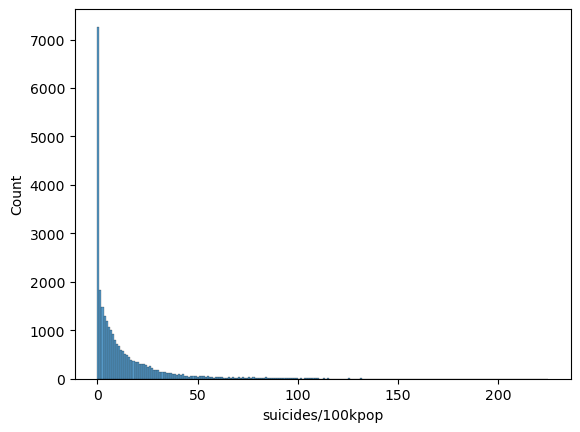

In [18]:
sns.histplot(master["suicides/100kpop"])


C:\Users\abdul\AppData\Local\Temp\ipykernel_5940\1868756664.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="year",ci=False, y="suicides/100kpop", data=master)


<AxesSubplot: xlabel='year', ylabel='suicides/100kpop'>

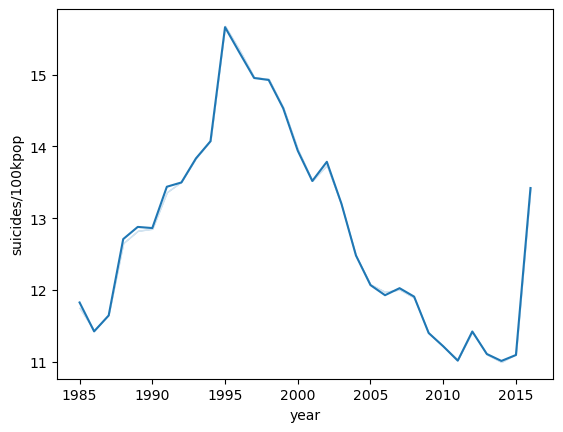

In [26]:
sns.lineplot(x="year",ci=False, y="suicides/100kpop", data=master)


In [ ]:
dfS

In [20]:
sns.lineplot(x="year", y="suicides_no", data=USAData)


NameError: name 'USAData' is not defined

In [ ]:
sns.barplot(x="country", y="suicides/100kpop", data=master)


In [ ]:
suicide_data_heatmap = master.pivot_table(index="age", columns="year", values="suicides/100k pop", aggfunc="mean")
sns.heatmap(suicide_data_heatmap, cmap="YlGnBu")
plt.show()

In [ ]:
USAData.groupby('year').sum()


In [ ]:
sns.scatterplot(x="gdp_per_capita ($)", y="suicides/100k pop", data=master)


In [ ]:
master = pd.read_csv('master.csv')

In [ ]:
master.columns=master.columns.str.replace(' ','')

In [ ]:
master.columns=master.columns.str.replace('(','').str.replace(')','').str.replace('$','')

In [ ]:
master.isna().sum()

In [ ]:
masterCat['popNorma'] = stats.zscore(masterCat['population'])


In [ ]:
popMin = masterCat.population.min()
popMax = masterCat.population.max()

In [ ]:
def normalize(x):
    return (x - popMin) / (popMax - popMin)

masterCat['popNorma'] = masterCat['population'].apply(normalize)

In [ ]:
masterCat.head()

In [ ]:
sns.pairplot(master)

In [ ]:
def corrfunc(x, y, **kwargs):
    def pvalue_stars(p):
        if 0.05 >= p > 0.01:
            return '*'
        elif 0.01 >= p > 0.001:
            return '**'
        elif p <= 0.001:
            return '***'
        else:
            return ''
    cmap = kwargs['cmap']
    norm = kwargs['norm']
    ax = plt.gca()
    ax.grid(False)
    r, p = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
    ax.annotate(f"{r:.2f}{pvalue_stars(p)}", xy=(.5, .5), xycoords=ax,
                color='white' if lightness < 0.7 else 'black',
                size=18, ha='center', va='center')
    
g = sns.PairGrid(masterCat, height=1.5, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_upper(corrfunc,
            cmap=plt.get_cmap('RdBu_r'), 
            norm=plt.Normalize(vmin=-1, vmax=1))
g.add_legend()
plt.show()

In [ ]:
masterCat = master.copy()

In [ ]:
test = masterCat.copy()

In [ ]:
masterCat.age.unique()

In [ ]:
test.age[test.age == '5-14 years'] = 1
test.age[test.age == '15-24 years'] = 2
test.age[test.age == '25-34 years'] = 3
test.age[test.age == '35-54 years'] = 4
test.age[test.age == '55-74 years'] = 5
test.age[test.age == '75+ years'] = 6


In [ ]:
test.head()

In [ ]:
masterCat.sex[masterCat.sex == 'male'] = 1
masterCat.sex[masterCat.sex == 'female'] = 2
masterCat.generation[masterCat.generation == 'G.I. Generation'] = 1
masterCat.generation[masterCat.generation == 'Silent'] = 2
masterCat.generation[masterCat.generation == 'Boomers'] = 3
masterCat.generation[masterCat.generation == 'Generation X'] = 4
masterCat.generation[masterCat.generation == 'Millenials'] = 5
masterCat.generation[masterCat.generation == 'Generation Z'] = 6
masterCat.age[masterCat.age == 'Generation Z'] = 1



In [ ]:
masterCat.population

In [ ]:
masterCat.country.unique()

In [ ]:
masterCat.loc[(masterCat['country']=='United States')&(masterCat['year']==2013)]

In [ ]:
test.head()

In [ ]:
#y = masterCat['suicides/100kpop']
y = test['suicides_no']

# set Y 
#x1=masterCat[['gdp_per_capita']]
#x1=masterCat[['population','sex','generation']]
#x1=masterCat[['sex','generation','gdp_per_capita']]
x1=test[['sex','generation','popNorma','age']]

In [ ]:
masterCat.sex = masterCat.sex.apply(pd.to_numeric)
masterCat.generation = masterCat.generation.apply(pd.to_numeric)
test.age = test.age.apply(pd.to_numeric)



In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

In [ ]:
USAData= test.loc[test['country']=='United States'].copy()

In [ ]:
sns.barplot(y='suicides_no',x='generation',hue='sex',data=test[test['country']=='United States'])

In [23]:
plt.figure(figsize=(24,8))
graph=sns.lineplot(prices_simple.wheat,label='Wheat Price  €')
graph.axvline(pd.to_datetime('1/31/2020'),c='r',label='WHO Issues Global Health Emergency',ymin=.1,ymax=.55)
graph.axvline(pd.to_datetime('2/24/2022'),c='black',label='Russia Invades Ukraine',ymin=.3,ymax=.98,)
plt.xlabel("")
plt.ylabel("Wheat Price  €")
props = dict(boxstyle='round', facecolor='#7393B3', alpha=0.5)
string1="Wheat prices begin\nan upward trend"
string2="Wheat prices\nhit a new record\nin March 2022"
text1=graph.text(0.7,0.4,string1,fontsize=14,transform=graph.transAxes,verticalalignment='center', bbox=props)
text2=graph.text(0.9,0.2,string2,fontsize=14,transform=graph.transAxes,verticalalignment='center', bbox=props)
graph.legend()

NameError: name 'prices_simple' is not defined

<Figure size 2400x800 with 0 Axes>

In [ ]:
tots = USAData.groupby('year')['suicides_no'].sum()
sns.barplot(y=tots,x='generation',hue='sex',data=test[test['country']=='United States'])

In [ ]:
#new_df = pd.DataFrame({'constant':1,'generation':[1,2,3,6], 'gdp_per_capita':[5000,789,5000,6000],'population':[300000000, 312900, 1200, 1200]})
#new_df = pd.DataFrame({'constant':1,'population':[300000000, 312900, 1200, 1200],'sex':[1,2,1,1],'generation':[1,4,6,4]})
#new_df = pd.DataFrame({'constant':1,'sex':[1,2,1,1],'generation':[1,4,6,4],'gdp_per_capita':[1222,789,5000,6000]})
new_df = pd.DataFrame({'constant':1,'age':[1,4,6,5],'sex':[1,2,1,2],'generation':[1,1,6,6],'popNorma':[0.906256,0.003256,0.066256,0.036256]})


In [ ]:
new_df['suicides'] = results.predict(new_df)
new_df

In [ ]:
masterCat.head()

In [22]:
#masterCat.loc[(masterCat['generation']==6) & (masterCat['sex']==1)&(masterCat['country']=='United States')]
masterCat.loc[(masterCat['generation']==1) &(masterCat['country']=='United States')]

,country,year,sex,age,suicides_no,population,suicides/100kpop,country-year,gdp_for_year,gdp_per_capita,generation,popNorma
26848,United States,1985,1,6,2177,4064000,53.57,United States1985,"4,346,734,000,000",19693,1,0.092769
26849,United States,1985,1,5,5302,17971000,29.50,United States1985,"4,346,734,000,000",19693,1,0.410244
26854,United States,1985,2,5,1568,21366000,7.34,United States1985,"4,346,734,000,000",19693,1,0.487747
26855,United States,1985,2,6,466,7469000,6.24,United States1985,"4,346,734,000,000",19693,1,0.170500
26860,United States,1986,1,6,2340,4178000,56.01,United States1986,"4,590,155,000,000",20588,1,0.095371
26861,United States,1986,1,5,5500,18101000,30.39,United States1986,"4,590,155,000,000",20588,1,0.413212
26866,United States,1986,2,5,1696,21455000,7.90,United States1986,"4,590,155,000,000",20588,1,0.489779
26867,United States,1986,2,6,521,7669000,6.79,United States1986,"4,590,155,000,000",20588,1,0.175065
26872,United States,1987,1,6,2532,4295000,58.95,United States1987,"4,870,217,000,000",21631,1,0.098042
26873,United States,1987,1,5,5482,18190000,30.14,United States1987,"4,870,217,000,000",21631,1,0.415244


In [ ]:
test.to_csv('cleanData.csv',index=False)

In [ ]:
clean = pd.read_csv('cleanData.csv')

In [ ]:
clean.head()